<a href="https://colab.research.google.com/github/TetianaMar-888/Python_for_ds_tasks/blob/main/Marinoshenko_Tetiana_%22HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
medical_df = pd.read_csv('drive/MyDrive/Machine_Learning/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [4]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [5]:
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [6]:
non_smoker_df.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [7]:
age = non_smoker_df['age'].values
charges = non_smoker_df['charges'].values

In [8]:
non_smoker_df[['age', 'charges']].isnull().sum()

,0
age,0
charges,0


#1

In [9]:
# Метод МНК (з використанням тільки numpy, без scikit learn)
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

In [10]:
x = np.array(X)
y = np.array(y)
n = len(x)

In [11]:
x, y

(array([18, 28, 33, ..., 18, 18, 21]),
 array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
         1629.8335 ,  2007.945  ]))

In [15]:
from sklearn.datasets import make_regression
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [17]:
# Замініть синтетичні дані на ваші:
x_data = non_smoker_df['age'].values
y_data = non_smoker_df['charges'].values

In [22]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([18, 28, 33]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [23]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [24]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [25]:
np.dot(X_with_intercept[0], MNK_coefs)

np.float64(2719.059874396516)

In [27]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
print(predictions_MNK[:3])

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [28]:
predictions_MNK

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [29]:
y

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

In [31]:
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.7.0 --force-reinstall

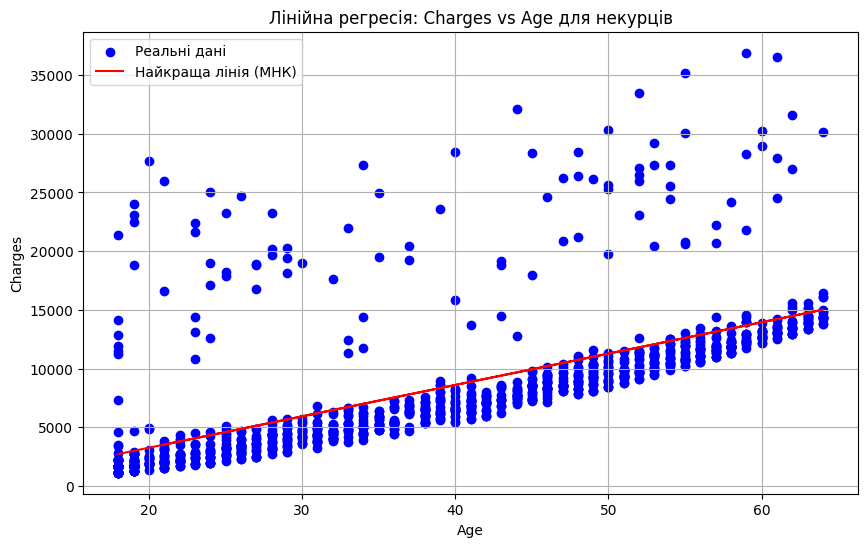

In [34]:
#Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Реальні дані')
plt.plot(X, predictions_MNK, color='red', label='Найкраща лінія (МНК)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Лінійна регресія: Charges vs Age для некурців')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
rmse = np.sqrt(np.mean((y - predictions_MNK) ** 2))
print(f"RMSE: {rmse:.2f}")

RMSE: 4662.51


In [38]:
import sklearn
import inspect
import sklearn.metrics

print("sklearn version:", sklearn.__version__)
print("mean_squared_error location:", inspect.getsourcefile(sklearn.metrics.mean_squared_error))
print("mean_squared_error signature:", inspect.signature(sklearn.metrics.mean_squared_error))

sklearn version: 1.6.1
mean_squared_error location: /usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py
mean_squared_error signature: (y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = sklearn.metrics.r2_score(y, predictions_MNK)
rmse = np.sqrt(np.mean((y - predictions_MNK) ** 2))
mae = sklearn.metrics.mean_absolute_error(y, predictions_MNK)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


In [43]:
np.mean(y), np.std(y), np.min(y)

(np.float64(8434.268297856204),
 np.float64(5990.9645302876115),
 np.float64(1121.8739))

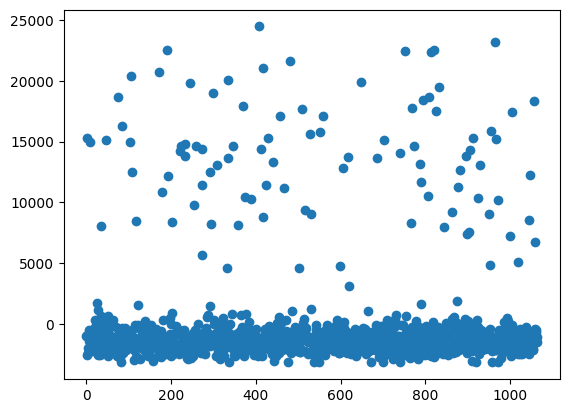

In [44]:
errors =  y - predictions_MNK
plt.plot(errors, 'o');

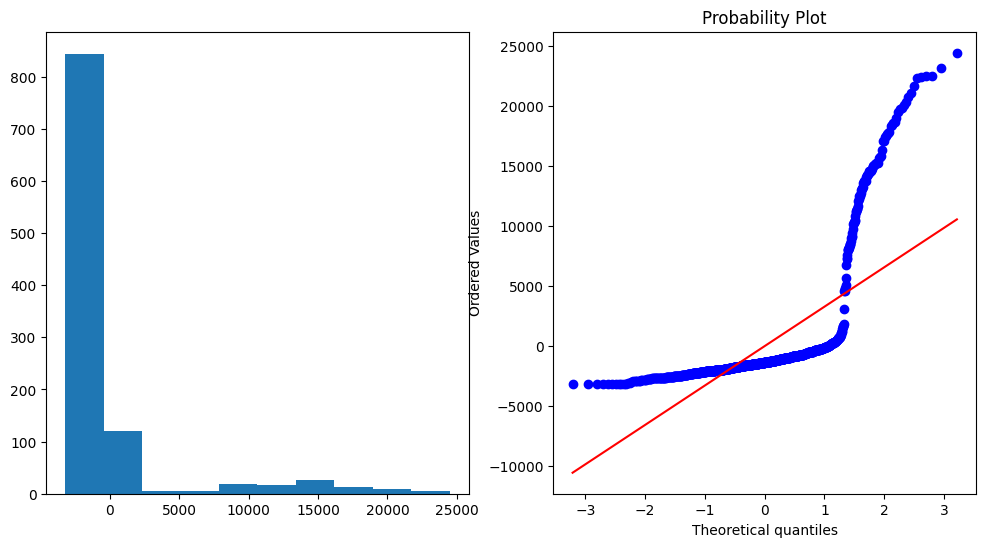

In [45]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors)
plt.subplot(1,2,2)
probplot(errors, dist='norm', plot=plt);

#2

In [ ]:
#Full-Batch градієнтного спуску з numpy .
#Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції.
#Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії".
#Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий.
#Спробуйте нижчі рейти.

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# Дані: некурці
X = non_smoker_df[["age"]].values
y = non_smoker_df["charges"].values

# Додаємо x0 = 1 для врахування зсуву (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Налаштування
learning_rates = [0.0001, 0.001, 0.01]
n_epochs = 1000
results = {}

# Градієнтний спуск для кожного learning rate
for lr in learning_rates:
    theta = np.random.randn(2, 1)  # випадкові стартові ваги
    loss_list = []

    for epoch in range(n_epochs):
        predictions = X_b.dot(theta)
        errors = predictions - y.reshape(-1, 1)
        gradients = 2 / len(X_b) * X_b.T.dot(errors)
        theta = theta - lr * gradients

        loss = np.mean(errors ** 2)
        loss_list.append(loss)

    results[str(lr)] = {"theta": theta, "loss": loss_list}


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-122-2360189684.py:24: RuntimeWarning: overflow encountered in square
  loss = np.mean(errors ** 2)
/tmp/ipython-input-122-2360189684.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - lr * gradients


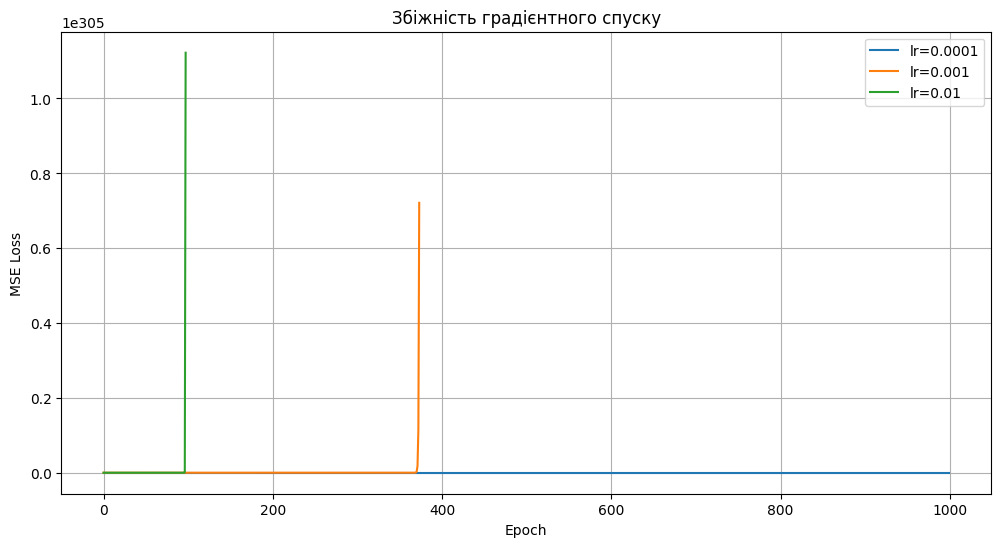

Найкращий learning rate: 0.0001
RMSE для найкращого learning rate: 4713.22
Коефіцієнти (theta):
[[-42.67011742]
 [221.12009422]]


In [123]:
# Побудова графіка збіжності
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(results[str(lr)]["loss"], label=f"lr={lr}")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Збіжність градієнтного спуску")
plt.legend()
plt.grid(True)
plt.show()

# Вибір найкращого learning rate (з найменшим фінальним MSE)
best_lr = min(results, key=lambda lr: results[lr]["loss"][-1])
best_theta = results[best_lr]["theta"]

# Прогноз і RMSE для найкращого результату
predictions_best = X_b.dot(best_theta).ravel()
rmse_best = np.sqrt(np.mean((y - predictions_best) ** 2))

print(f"Найкращий learning rate: {best_lr}")
print(f"RMSE для найкращого learning rate: {rmse_best:.2f}")
print(f"Коефіцієнти (theta):\n{best_theta}")

In [109]:
y_hat = b + x*m

In [101]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.0001, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
predictions_fbgd = m * X[:, 0] + b

m, b

(np.float64(221.1045843794301), np.float64(-41.98126853149978))

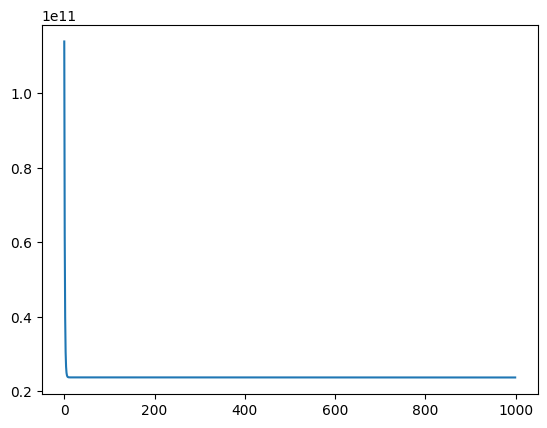

In [102]:
plt.plot(range(1000),errors)

In [128]:
def stochastic_gradient_descent(X, y, lr=0.0001, epochs=500):
    m, b = 0.0, 0.0  # Initial parameters
    n = len(y)
    for _ in range(epochs):
        for i in range(n):
            x_i = X[i, 0]  # Assuming X is a 2D array with one feature column
            y_i = y[i]
            y_pred_i = m * x_i + b
            error_i = y_pred_i - y_i
            m_gradient = 2 * error_i * x_i
            b_gradient = 2 * error_i
            m -= lr * m_gradient
            b -= lr * b_gradient
    return m, b

m, b = stochastic_gradient_descent(X, y, lr=0.0001, epochs=500)
predictions_sgd = m * X[:, 0] + b

In [66]:
m, b

(np.float64(nan), np.float64(nan))

#3

In [ ]:
!pip install scikit-learn --quiet

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [78]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(np.float64(-2091.4205565650864), array([267.24891283]))

In [79]:
predictions_sklearn = lin_reg.predict(X)

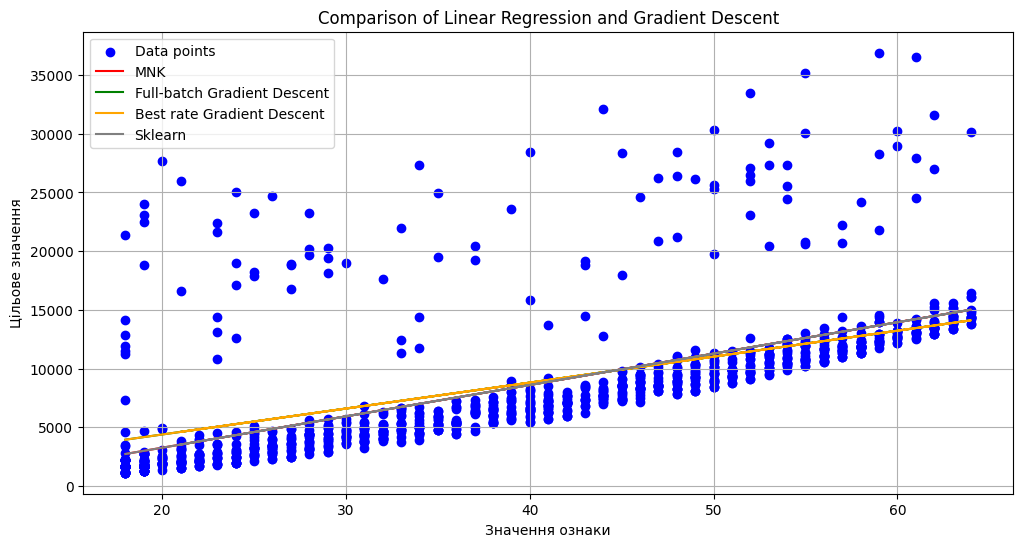

In [130]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_best, color='orange', label='Best rate Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print(f"Коефіцієнти (theta):\n{best_theta}")
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти (theta):
[[-42.67011742]
 [221.12009422]]
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


In [133]:
from sklearn.metrics import mean_squared_error

print('RMSE МНК: ', rmse)

print(f"RMSE для найкращого learning rate: {rmse_best:.2f}")


#rmse_sgd = mean_squared_error(y, predictions_sgd, squared=False)
#print('RMSE стохаст. град. спуску: ', rmse_sgd)

#rmse_sklearn = mean_squared_error(y, predictions_sklearn, squared=False)
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE для найкращого learning rate: 4713.22
RMSE sklearn:  4662.505766636395


# Висновки
Методи МНК та sklearn дали однакові прогнози. Градієнтний спуск дещо трохи вищий в показниках

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [87]:
# Відбір лише курців
smoker_df = medical_df[medical_df['smoker'] == 'yes']

# Підготовка даних
X_smok = smoker_df[['age']]  # Важливо: подвійні дужки -> DataFrame
y_smok = smoker_df['charges']

In [134]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [88]:
from sklearn.linear_model import LinearRegression

# Створення та навчання моделі
model = LinearRegression()
model.fit(X_smok, y_smok)

# Вивід коефіцієнтів
print(f"Коефіцієнт (b1): {model.coef_[0]:.2f}")
print(f"Зсув (b0): {model.intercept_:.2f}")

Коефіцієнт (b1): 305.24
Зсув (b0): 20294.13


In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Прогноз
y_pred_smok = model.predict(X_smok)

# Метрики
mse_smok = mean_squared_error(y_smok, y_pred_smok)
rmse_smok = mse_smok ** 0.5
mae_smok = mean_absolute_error(y_smok, y_pred_smok)
r2_smok = r2_score(y_smok, y_pred_smok)

print(f"RMSE: {rmse_smok:.2f}")
print(f"MAE: {mae_smok:.2f}")
print(f"R²: {r2_smok:.2f}")

RMSE: 10711.00
MAE: 10097.80
R²: 0.14


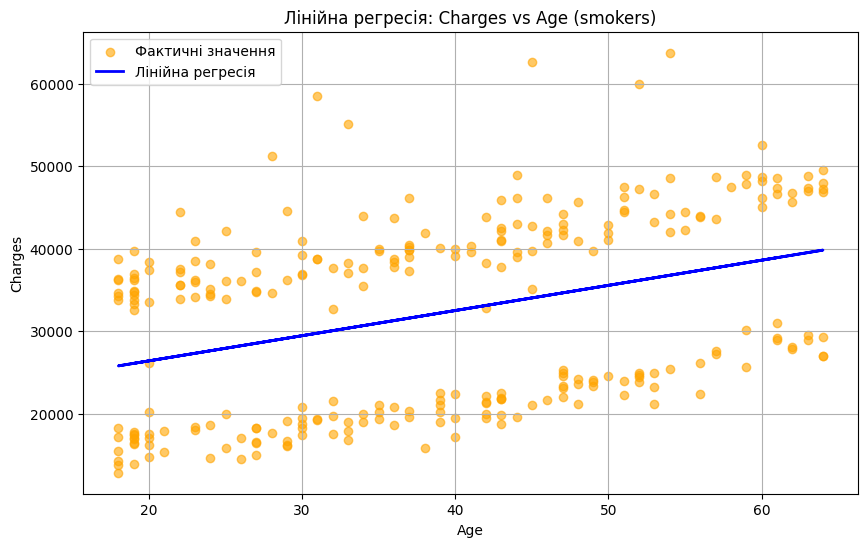

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_smok, y_smok, color='orange', alpha=0.6, label='Фактичні значення')
plt.plot(X_smok, y_pred_smok, color='blue', linewidth=2, label='Лінійна регресія')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Лінійна регресія: Charges vs Age (smokers)")
plt.legend()
plt.grid(True)
plt.show()

# R²: 0.14 говорить про погану апроксимацію моделі
 P.S. Я б перевірила ще додатково на інших моделях. Коли засвою їх краще. Без каші в голові )))